## Microsoft Azure Logging

NOTE

This was commercial work completed to help build out tooling for proactive infastrucutre analysis and problem detection from Microsoft Azure data. The dataset used has been generated in Microsfot Excel to mirror close to the original quantitative data. Furthermore, categorical naming and datetime data has been changed.

#### SYSTEM INFASTRUCTURE BACKGROUND

The specific type of logging indicates the servers hit by client traffic/requests for subject specific information to be returned across Microsoft Azure Cloud Infastructure. Specific clients will be aligned with Azure clusters/engine-nodes. Cluster will hold include certain engine nodes at different periods in time dependent on customer/client traffic expectations.


#### Server 

We will not desribe the particular servers functionality in this case. However, what is import to understand is that the serves which are assigned to specific nodes in this instance were being hit to return in house functionality. This Python script will not detail this functionality. What is important is the usecase of the code to pull out specific information from our data.

Using our logging tooling we can acquire upto 15 days logs for specific system infastructure logging aimed at both proactive and reactive problem detection and solution.

Data

- Date : log date
- EngineNode : Specific engine node used across & assinged to specific clusters for specific clients
- Client : Live client customer
- RequestSize(TB) : Custumer|Client Server Request Size (Memory) - Terabytes
- Milliseconds : Time milliseconds to return price to customer
- Seconds : Time seconds to return price to customer
- Minutes : Time minutes to return price to customer

In [19]:
import numpy as np # import numpy package for numerical python
import pandas as pd # import pandas

# import visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px 
from plotly.subplots import make_subplots
import plotly.graph_objects as go

#
from collections import Counter, OrderedDict
from operator import itemgetter   

from sklearn.preprocessing import normalize, StandardScaler # data pre-processing libraries and modules

Python Collections Module: https://www.geeksforgeeks.org/python-collections-module/

#### DATA CLEANING AND FEATURE ENGINEERING

In [20]:
#Create Dataframe from CSV file & parse dates
data = pd.read_excel('DataDecodedPrepared.xlsx', parse_dates = True)

#create copy of orginal dataframe
data_copy = data.copy(deep = True)

# drop column
#data.drop(data.columns[[8,9]], axis=1, inplace=True)

# strng strip (remove part of string)
data['Milliseconds'] = data['Milliseconds'].str.rstrip('ms')
# remove white space
data['Client'] = data['Client'].str.strip()
data['EngineNode'] = data['EngineNode'].str.strip()

#covert 'Date' column object to datetime object
data['Date'] = pd.to_datetime(data['Date'])

#
data['Milliseconds'] = data['Milliseconds'].astype('int64')

#new column milliseconds conversion to seconds
data['Seconds'] = data['Milliseconds']/1000

#new column seconds conversion to minutes
data['Minutes'] = data['Milliseconds']/60000

# new column include log alert
data['AlertFrequency'] = data.index + 1 #  dataframe index, integer numbers or string values, column labels(column names), usually strings 

In [21]:
data

Date                    Host  \
0     2021-06-07 15:42:35.251000+00:00  "ExporterFunctionType"   
1     2021-06-07 15:39:17.336000+00:00  "ExporterFunctionType"   
2     2021-06-07 15:39:16.472000+00:00  "ExporterFunctionType"   
3     2021-06-07 15:33:21.699000+00:00  "ExporterFunctionType"   
4     2021-06-07 15:24:09.251000+00:00  "ExporterFunctionType"   
...                                ...                     ...   
51163 2021-05-23 15:49:55.448000+00:00  "ExporterFunctionType"   
51164 2021-05-23 15:48:01.177000+00:00  "ExporterFunctionType"   
51165 2021-05-23 15:47:29.462000+00:00  "ExporterFunctionType"   
51166 2021-05-23 15:47:19.769000+00:00  "ExporterFunctionType"   
51167 2021-05-23 15:47:19.087000+00:00  "ExporterFunctionType"   

                      Service EngineNode                           Client  \
0      "AzureTaskType_1_Logs"   engine75                         Wallmart   
1      "AzureTaskType_1_Logs"    engine1                         Wallmart   
2      "AzureTaskType_1_Logs"    engine6                     Saudi Aramco   
3      "AzureTaskType_1_Logs"    engine3  State Grid Corporation of China   
4      "AzureTaskType_1_Logs"    engine4                         Wallmart   
...                       ...        ...                              ...   
51163  "AzureTaskType_1_Logs"    engine1                       Apple Inc.   
51164  "AzureTaskType_1_Logs"    engine8                       Apple Inc.   
51165  "AzureTaskType_1_Logs"   engine22                         Wallmart   
51166  "AzureTaskType_1_Logs"    engine4                         Wallmart   
51167  "AzureTaskType_1_Logs"    engine6                         Wallmart   

       RequestSize(TB)         Unnamed: 6  Seconds  Milliseconds   Minutes  \
0                    5    4.06 in 22555ms   22.555         22555  0.375917   
1                    2     4.97 in 5110ms    5.110          5110  0.085167   
2                    5    17.35 in 5816ms    5.816          5816  0.096933   
3                   12      71 in 22475ms   22.475         22475  0.374583   
4                    4    1.92 in 22521ms   22.521         22521  0.375350   
...                ...                ...      ...           ...       ...   
51163               12      251 in 5436ms    5.436          5436  0.090600   
51164               10      401 in 5268ms    5.268          5268  0.087800   
51165               14   329.49 in 5414ms    5.414          5414  0.090233   
51166               14   169.26 in 5195ms    5.195          5195  0.086583   
51167                2    4.53 in 22254ms   22.254         22254  0.370900   

       AlertFrequency  
0                   1  
1                   2  
2                   3  
3                   4  
4                   5  
...               ...  
51163           51164  
51164           51165  
51165           51166  
51166           51167  
51167           51168  

[51168 rows x 11 columns]

#### LOG FREQUENCY

We will need to count each alert (len(df)) as an individual alert which is the case, however in this dataset we do not have this specific column/series data. We can do this with further feature engineering be creating a new column and using the index to increment the value of the index on each iteration by 1 using the dataframe. 

NOTE

Its important to remember zero indexing for this task.

VISUALIZATION

Simply, we can then plot this quantitative discrete data against time using our datetime column in the pandas dataframe. We will be using a histogram to visualize the data.

In [22]:
# Using plotly express line plot we can visualize the distrubtion of the quantitive discrete data over time
fig = px.histogram(data_frame = data, x = 'Date', y = 'AlertFrequency',color_discrete_sequence=['red'],
                   opacity=0.6, width=1000, height=500 ,histnorm="probability")
#
fig.update_layout(
    margin=dict(l=20, r=20, t=20, b=20),
    paper_bgcolor="LightSteelBlue",
)
#
fig.show()

In terms of subject matter this is highly important information as we can see when our Azure clsuer/nodes were under most constraint within this time period. This can then be cross analysed against further findings below. 

For example later in our script we will be analysing engine node and specific server (function) returned in seconds. If we see trends such as spikes in the earlier dates this would coincide with the above findings. However, if we are seeing trend spikes in returned server functions in the latter periods this potentially could indicate a deeper problem.

#### DESCRIPTIVE STATISTICS

In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51168 entries, 0 to 51167
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype              
---  ------           --------------  -----              
 0   Date             51168 non-null  datetime64[ns, UTC]
 1   Host             51168 non-null  object             
 2   Service          51168 non-null  object             
 3   EngineNode       51168 non-null  object             
 4   Client           51168 non-null  object             
 5   RequestSize(TB)  51168 non-null  int64              
 6   Unnamed: 6       51168 non-null  object             
 7   Seconds          51168 non-null  float64            
 8   Milliseconds     51168 non-null  int64              
 9   Minutes          51168 non-null  float64            
 10  AlertFrequency   51168 non-null  int64              
dtypes: datetime64[ns, UTC](1), float64(2), int64(3), object(5)
memory usage: 4.3+ MB


In [24]:
data.describe()

RequestSize(TB)       Seconds   Milliseconds       Minutes  \
count     51168.000000  51168.000000   51168.000000  51168.000000   
mean          9.791784      9.033614    9033.613645      0.150560   
std           4.801510      6.885499    6885.499046      0.114758   
min           1.000000      5.001000    5001.000000      0.083350   
25%           5.000000      5.303000    5303.000000      0.088383   
50%          12.000000      5.795000    5795.000000      0.096583   
75%          14.000000      9.016000    9016.000000      0.150267   
max          25.000000    244.052000  244052.000000      4.067533   

       AlertFrequency  
count    51168.000000  
mean     25584.500000  
std      14771.073624  
min          1.000000  
25%      12792.750000  
50%      25584.500000  
75%      38376.250000  
max      51168.000000

In [25]:
data.describe(include=object)

Host                 Service EngineNode    Client  \
count                    51168                   51168      51168     51168   
unique                       1                       1         97        24   
top     "ExporterFunctionType"  "AzureTaskType_1_Logs"    engine5  Wallmart   
freq                     51168                   51168       3847     33103   

            Unnamed: 6  
count            51168  
unique           48857  
top      201 in 5018ms  
freq                 5

### Engine Node Analysis
In this section of our script we will cut into our dataset to pull out useful information. This will be done by data wrangling and datavisualization techniques. Through this we can gather useful insights into our Engine nodes performance. Commercially this was extremely useful information to build into tooling.

DATA ANALYSIS TASKS
- Visualize client count in this dataset
- Visualize the server return time via lineplot acrooss time for keyAzure Engine Nodes
- Visualize the data where metrics are above certain values

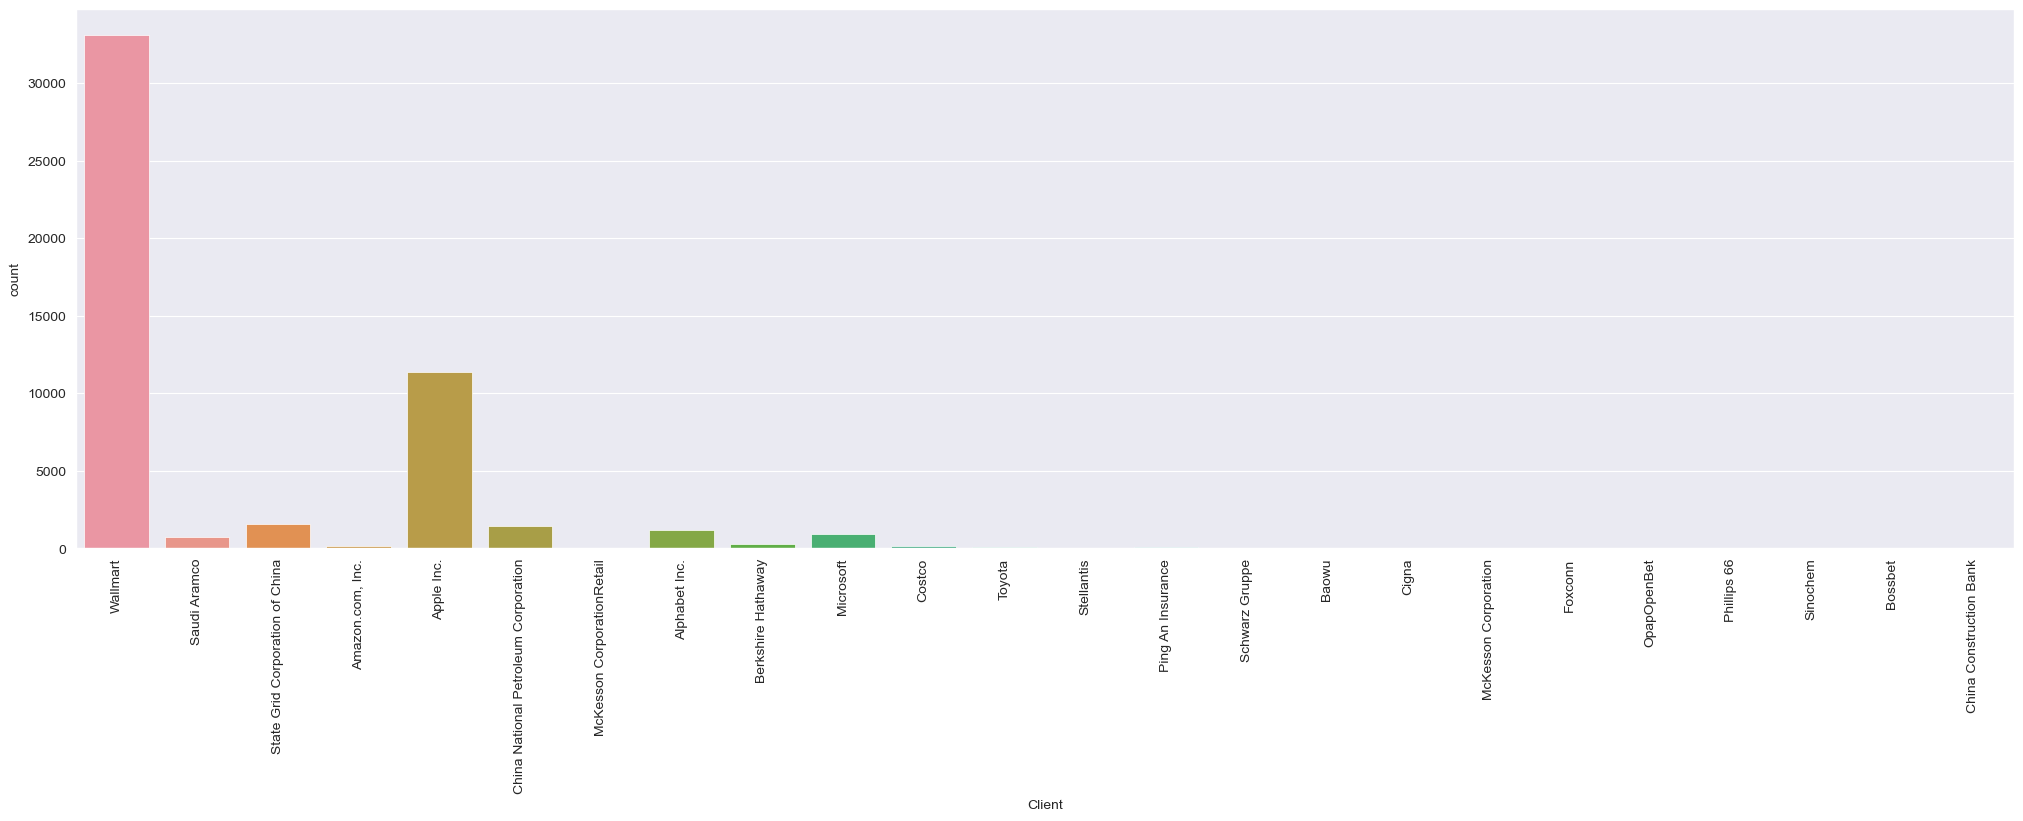

Wallmart                                33103
Apple Inc.                              11367
State Grid Corporation of China          1575
China National Petroleum Corporation     1464
Alphabet Inc.                            1200
Microsoft                                 922
Saudi Aramco                              744
Berkshire Hathaway                        257
Amazon.com, Inc.                          128
Costco                                    115
Name: Client, dtype: int64

In [26]:
plt.figure(figsize=(25,7))
sns.set_style('darkgrid')
sns.countplot(x = data['Client'], data = data)
plt.xticks(rotation = 90)
plt.show ()
#
display(data['Client'].value_counts().head(10))

NOTE

For our next this has been quiet difficult to find a method for the particular functionality we want. We need to seperate the key engine nodes into seperate isolated dataframes to maintain all data across all columns. The reason we need this is it has been easier to work with our data in the coming tasks. There was difficulty pre-defining variables followed by using ising method an subestting the data.

Will continue to search for a better method ! However, the below code returns what is needed for now.

In [27]:
# subsetting based on categorical data (Pandas isin method)
en_5 = data['EngineNode'].isin(["engine5"])  # isin() method checks if the Dataframe contains the specified value(s) returns boolean values
en_5 = data[en_5] # subset data
#
en_1 = data['EngineNode'].isin(["engine1"])
en_1 = data[en_1]
#
en_0 = data['EngineNode'].isin(["engine0"])
en_0 = data[en_0]
#
en_3 = data['EngineNode'].isin(["engine3"])
en_3 = data[en_3]
#
en_4 = data['EngineNode'].isin(["engine4"])
en_4 = data[en_4]
#
en_9 = data['EngineNode'].isin(["engine9"])
en_9 = data[en_9]
#
en_2 = data['EngineNode'].isin(["engine2"])
en_2 = data[en_2]
#
en_6 = data['EngineNode'].isin(["engine6"])
en_6 = data[en_6]
#
en_8 = data['EngineNode'].isin(["engine8"])
en_8 = data[en_8]
#
en_7 = data['EngineNode'].isin(["engine7"])
en_7 = data[en_7]
#

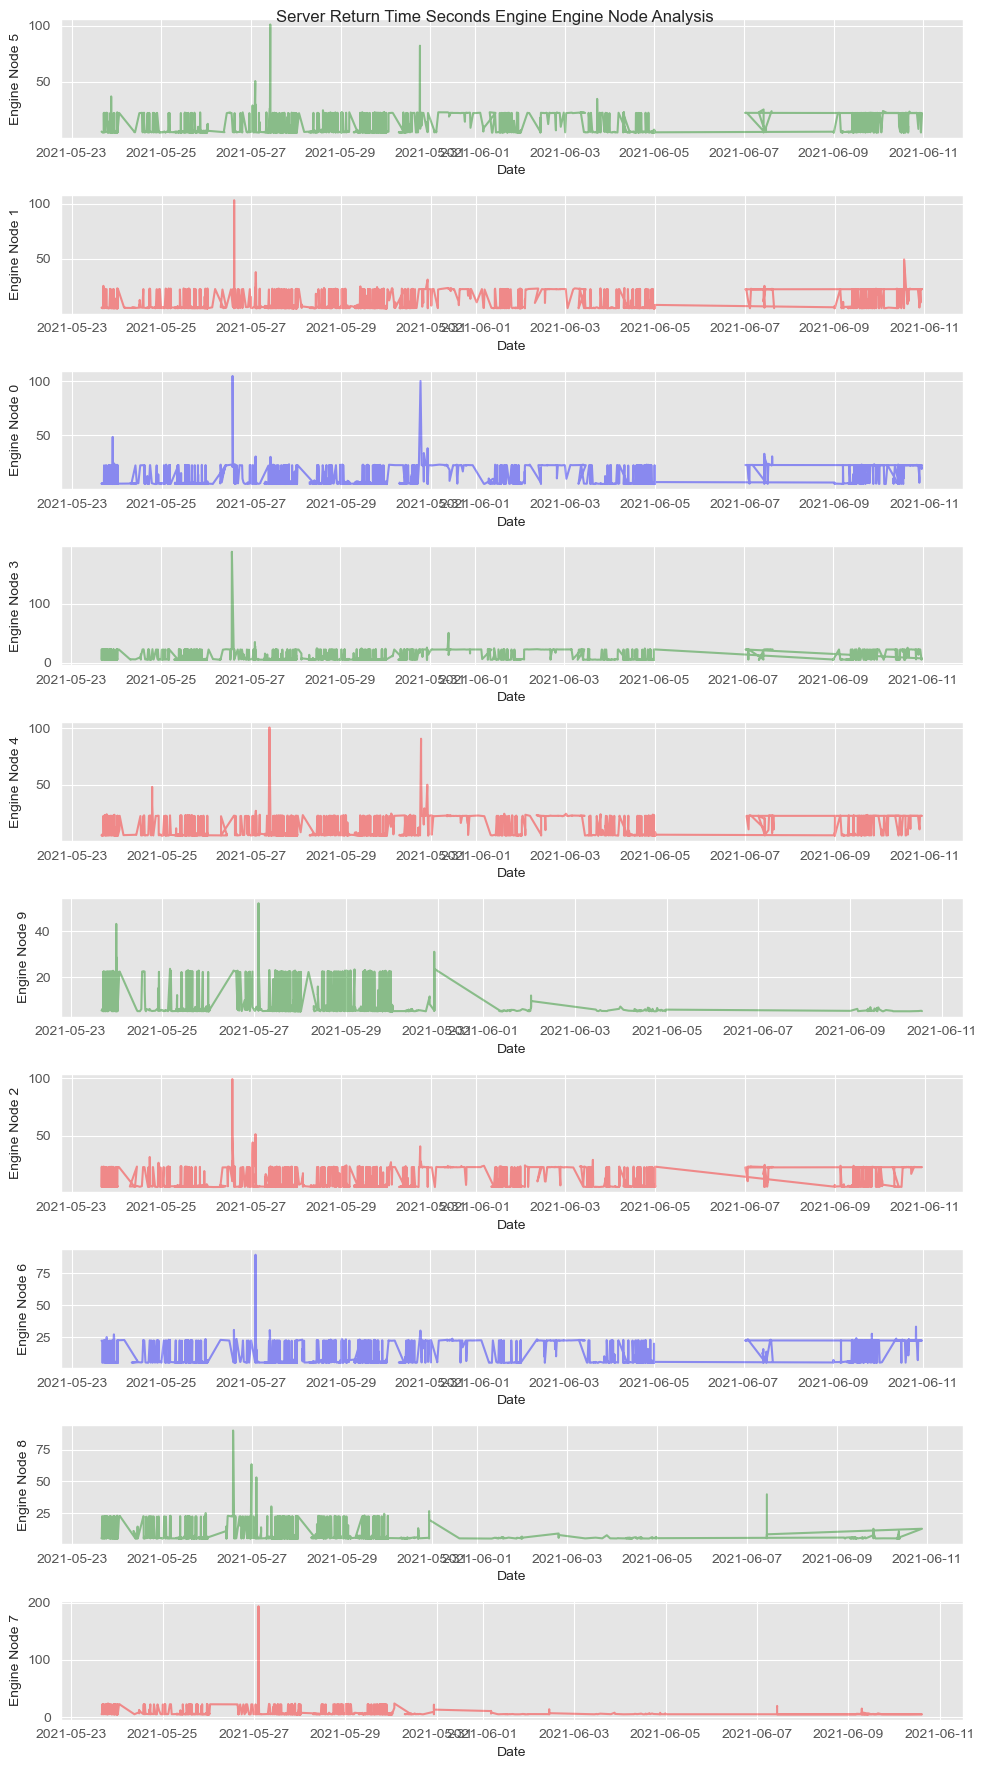

In [28]:
# Generate Line Plots (Subplots) using matplotlib
plt.style.use('ggplot')
fig, ax = plt.subplots(10, figsize = (10,18), sharey= False)
fig.suptitle('Server Return Time Seconds Engine Engine Node Analysis')

#
ax[0].plot(en_5['Date'], en_5['Seconds'], color = 'g', alpha = 0.4)
ax[1].plot(en_1['Date'], en_1['Seconds'], color = 'r', alpha = 0.4)
ax[2].plot(en_0['Date'], en_0['Seconds'], color = 'b', alpha = 0.4)
ax[3].plot(en_3['Date'], en_3['Seconds'], color = 'g', alpha = 0.4)
ax[4].plot(en_4['Date'], en_4['Seconds'], color = 'r', alpha = 0.4)
ax[5].plot(en_9['Date'], en_9['Seconds'], color = 'g', alpha = 0.4)
ax[6].plot(en_2['Date'], en_2['Seconds'], color = 'r', alpha = 0.4)
ax[7].plot(en_6['Date'], en_6['Seconds'], color = 'b', alpha = 0.4)
ax[8].plot(en_8['Date'], en_8['Seconds'], color = 'g', alpha = 0.4)
ax[9].plot(en_7['Date'], en_7['Seconds'], color = 'r', alpha = 0.4)

#Set xlabe;s
ax[0].set_xlabel('Date')
ax[1].set_xlabel('Date')
ax[2].set_xlabel('Date')
ax[3].set_xlabel('Date')
ax[4].set_xlabel('Date')
ax[5].set_xlabel('Date')
ax[6].set_xlabel('Date')
ax[7].set_xlabel('Date')
ax[8].set_xlabel('Date')
ax[9].set_xlabel('Date')

#set y labels
ax[0].set_ylabel('Engine Node 5')
ax[1].set_ylabel('Engine Node 1')
ax[2].set_ylabel('Engine Node 0')
ax[3].set_ylabel('Engine Node 3')
ax[4].set_ylabel('Engine Node 4')
ax[5].set_ylabel('Engine Node 9')
ax[6].set_ylabel('Engine Node 2')
ax[7].set_ylabel('Engine Node 6')
ax[8].set_ylabel('Engine Node 8')
ax[9].set_ylabel('Engine Node 7')

#Set spacing
fig.tight_layout()
plt.show()

When we cross analyse our alert distrubiton over this time period, this would coincide the drop of in latter days we see in load on the engine nodes. This is measured in our peviosu log frequency visualization. We can see clearly from our visualization that the load is less than starting dates here on our top nodes. Please refer to the log frequency alert to make cross compaarisons.

## Engine Node | > RequestSize(TB) Terabytes | > Average Seconds | Time Taken 
For this part of our analysis we will be cross analysing 15 nodes based on their value counts in this dataframe. These nodes are considered under highest constraint during this timeframe from our previous analysis.

In [30]:
# Tope nodes
display(data['EngineNode'].value_counts().head(10))

engine5    3847
engine1    3677
engine0    3435
engine3    3422
engine4    3295
engine9    3207
engine2    3181
engine6    3046
engine8    2583
engine7    2078
Name: EngineNode, dtype: int64

In [32]:
# subsetting based on categorical data (Pandas isin method)
top_nodes = data['EngineNode'].isin(['engine5','engine1','engine0','engine3','engine4','engine9','engine2'])
top_nodes = data[top_nodes]
#
key_nodes = top_nodes[np.logical_and(top_nodes['RequestSize(TB)'] > 10, top_nodes['Seconds'] > 9)]
key_nodes.head()

Date                    Host  \
3   2021-06-07 15:33:21.699000+00:00  "ExporterFunctionType"   
19  2021-06-07 14:45:36.326000+00:00  "ExporterFunctionType"   
27  2021-06-07 14:45:28.876000+00:00  "ExporterFunctionType"   
105 2021-06-07 14:22:58.126000+00:00  "ExporterFunctionType"   
158 2021-06-07 14:13:02.710000+00:00  "ExporterFunctionType"   

                    Service EngineNode                           Client  \
3    "AzureTaskType_1_Logs"    engine3  State Grid Corporation of China   
19   "AzureTaskType_1_Logs"    engine5                         Wallmart   
27   "AzureTaskType_1_Logs"    engine4                         Wallmart   
105  "AzureTaskType_1_Logs"    engine0                         Wallmart   
158  "AzureTaskType_1_Logs"    engine4                         Wallmart   

     RequestSize(TB)         Unnamed: 6  Seconds  Milliseconds   Minutes  \
3                 12      71 in 22475ms   22.475         22475  0.374583   
19                15   66.88 in 23968ms   23.968         23968  0.399467   
27                12   25.58 in 22822ms   22.822         22822  0.380367   
105               11   27.58 in 22654ms   22.654         22654  0.377567   
158               12   39.86 in 22587ms   22.587         22587  0.376450   

     AlertFrequency  
3                 4  
19               20  
27               28  
105             106  
158             159

In [33]:
# genrate pie chart categorized by clients
fig = px.pie(key_nodes, values='Seconds', names='Client',title='-')
#
fig.update_traces(textposition='inside', textinfo='percent+label')
#
# Update title and height
fig.update_layout(height=700, width=1000,
                  title_text="TOP Engine Nodes | > Average Request Size (TB)| Seconds > (average seconds) | Time Taken Returned Functionality ")
fig.show()